# create stock path
- Black_Scholes_model
- Black_Scholes_Merton_model
- Heston_model

In [1]:
import QuantLib as ql
import numpy as np
import matplotlib.pyplot as plt
from src.QlStockPricer import QlMarket, QlStockPricer

In [27]:
def plot_fig(data):
    #1. 创建画布（调整大小适应大量曲线）
    plt.figure(figsize=(15, 8), dpi=100)
    
    # 2. 绘制所有折线（优化显示效果）
    for i, arr in enumerate(data):
        plt.plot(arr, 
                 linewidth=0.9,  # 细线避免重叠
                 alpha=0.3,      # 半透明区分重叠曲线
                 # color='blue'  # 统一颜色
                 ) 
    
    # 3. 添加图表元素
    plt.title(f"{n} Curves Visualization", fontsize=14)
    plt.xlabel("Index", fontsize=12)
    plt.ylabel("Value", fontsize=12)
    plt.grid(True, linestyle=':', alpha=0.5)  # 辅助网格线
    
    # 4. 显示/保存
    plt.tight_layout()  # 自动调整间距
    # plt.savefig('massive_lines.png', bbox_inches='tight')  # 保存高清图片
    plt.show()

# 设置市场

In [3]:
start_date = ql.Date(1,1,2023)

qlMarket = QlMarket(init_date=start_date)

start_date = qlMarket.init_date
print(start_date)

January 3rd, 2023


In [17]:
steps = 252

#  Black Scholes model

In [18]:
stock_1 = QlStockPricer(QlMarket=qlMarket, init_stock_price=100.0)
stock_1.using_Black_Scholes_model(sigma=0.2)
stock_path_generator1 = stock_1.create_stock_path_generator(steps)
one_random_path1 = np.array(stock_path_generator1.next().value())
print(one_random_path1[:5])

Next step, you need set model type
set new model: Black Scholes model with sigma: 0.2
使用步数: 252 步
timesteps: 252, Time length(per year): 1.0start_date: January 3rd, 2023 end_date: January 10th, 2024
[100.         101.1623608  100.69322178 102.08948231 101.44680408]


In [19]:
# 1. 生成示例数据（n个）
n = 500
data = [np.array(stock_path_generator1.next().value()) for _ in range(n)]  # 替换为你的实际数据

In [20]:
np.array(data)[:,-1].mean()

105.50929747442714

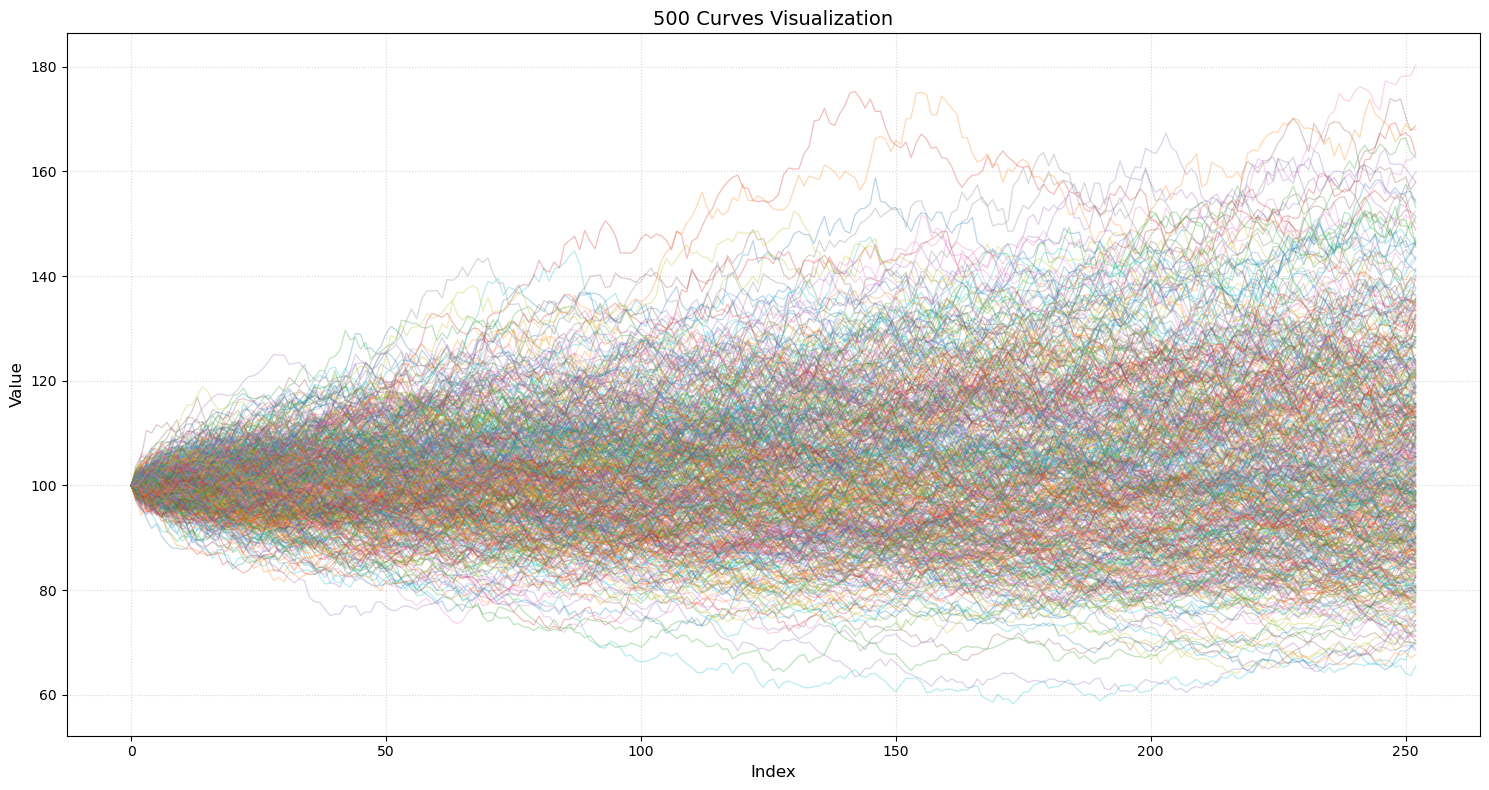

In [28]:
plot_fig(data)
del data

# Black Scholes Merton model

In [31]:
stock_2_1 = QlStockPricer(QlMarket=qlMarket, init_stock_price=100.0)
stock_2_1.using_Black_Scholes_Merton_model(dividend_rate=0.0, sigma=0.2)
stock_path_generator2_1 = stock_2_1.create_stock_path_generator(steps)
one_random_path2_1 = np.array(stock_path_generator2_1.next().value())


Next step, you need set model type
set new model: Black Scholes Merton model with sigma: 0.2, yield rate: 0.0
使用步数: 252 步
timesteps: 252, Time length(per year): 1.0start_date: January 3rd, 2023 end_date: January 10th, 2024


In [32]:
n = 500
data2 = [np.array(stock_path_generator1.next().value()) for _ in range(n)]  

In [34]:
np.array(data2)[:,-1].mean()

107.19181622599825

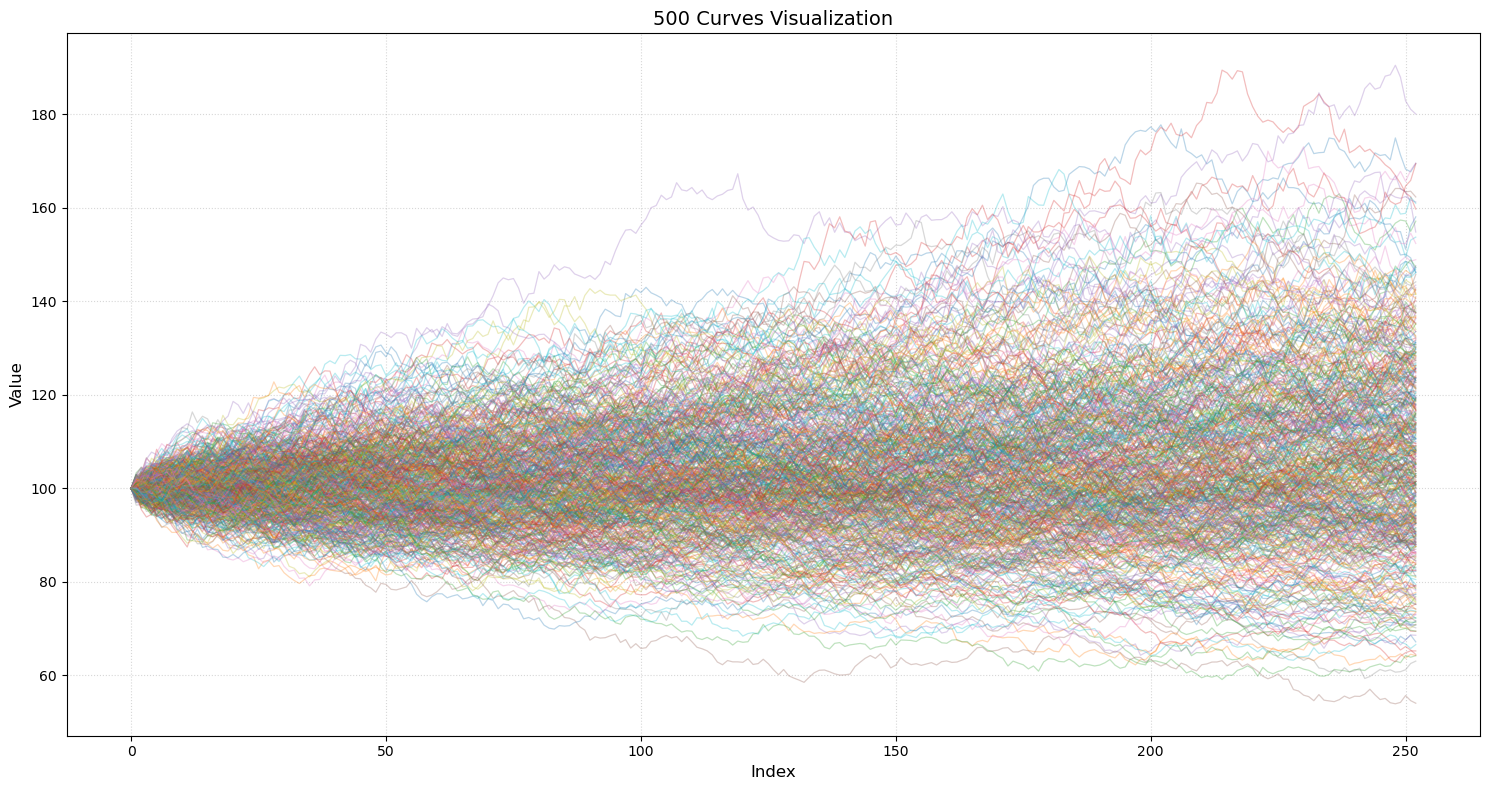

In [35]:
plot_fig(data2)
del data2

In [36]:
stock_2_2 = QlStockPricer(QlMarket=qlMarket, init_stock_price=100.0)
stock_2_2.using_Black_Scholes_Merton_model(dividend_rate=0.5, sigma=0.2)
stock_path_generator2_2 = stock_2_2.create_stock_path_generator(steps)
one_random_path2_2 = np.array(stock_path_generator2_2.next().value())


Next step, you need set model type
set new model: Black Scholes Merton model with sigma: 0.2, yield rate: 0.5
使用步数: 252 步
timesteps: 252, Time length(per year): 1.0start_date: January 3rd, 2023 end_date: January 10th, 2024


In [37]:
n = 500
data2_2 = [np.array(stock_path_generator2_2.next().value()) for _ in range(n)] 

In [38]:
np.array(data2_2)[:,-1].mean()


63.994623802980804

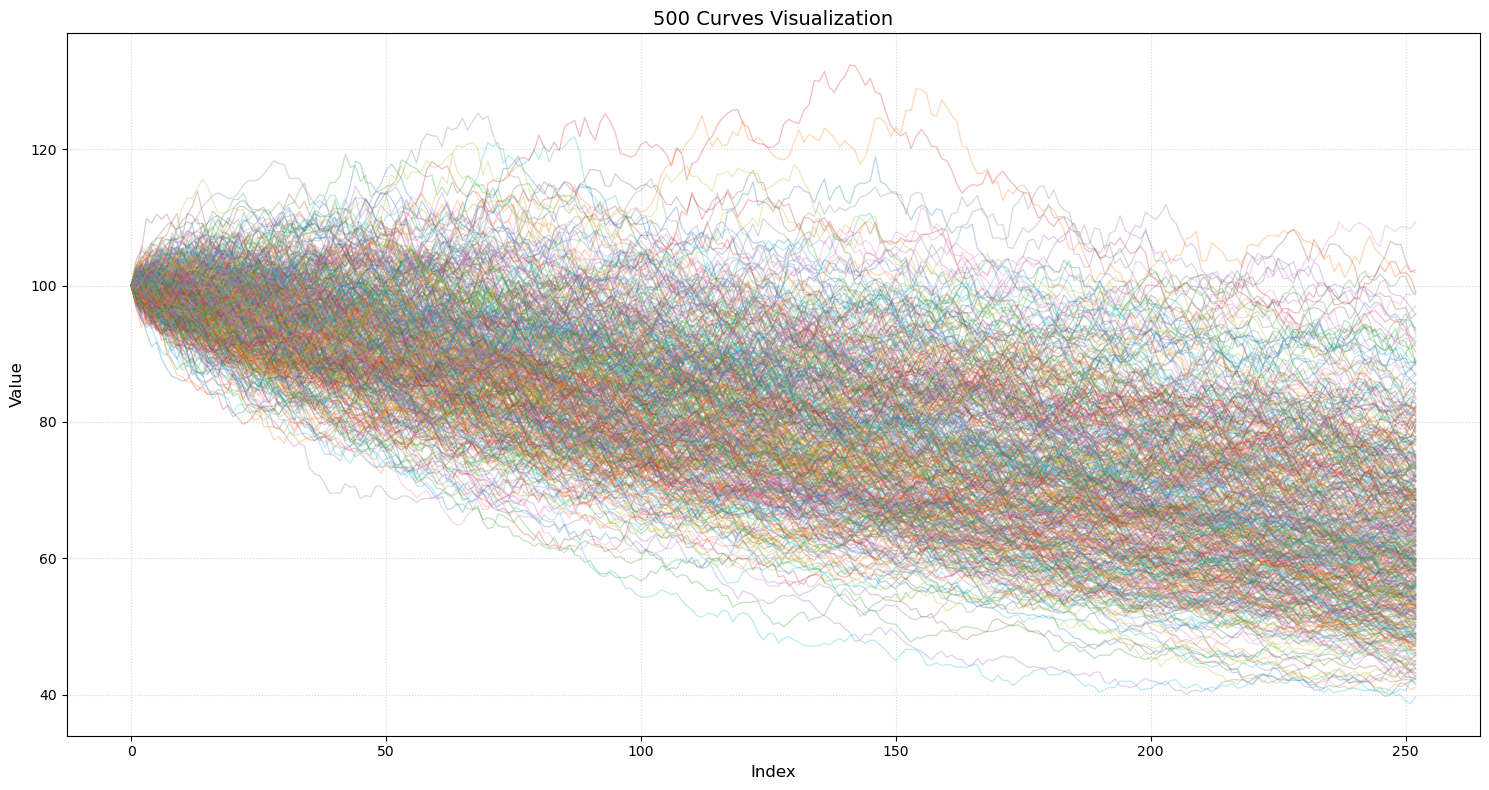

In [39]:
plot_fig(data2_2)
del data2_2

# Heston_model

In [40]:
stock_3 = QlStockPricer(QlMarket=qlMarket, init_stock_price=100.0)
stock_3.using_Heston_model()
stock_path_generator3 = stock_3.create_stock_path_generator(steps)
one_random_path3 = np.array(stock_path_generator3.next().value())
print(one_random_path3.shape)

Next step, you need set model type
set new model: Heston model with yield rate: v0: 0.005, kappa: 0.8, theta: 0.008, rho: 0.2, sigma: 0.1, None
使用步数: 252 步
timesteps: 252, Time length(per year): 1.0start_date: January 3rd, 2023 end_date: January 10th, 2024
(2, 253)


In [41]:
one_random_path3[0]

array([100.        , 100.24800298, 100.48961997, 100.72482319,
       100.95358702, 100.75913225, 100.98811862, 100.79345132,
       101.02265932, 101.36165145, 101.05703183, 100.76398244,
       100.57647998, 100.38212528, 100.7302301 , 100.5212247 ,
       100.30552452, 100.08319525, 100.47280998, 100.87453586,
       101.28847314, 101.71472676, 101.45361551, 101.18611704,
       100.77447572, 101.21917387, 101.6763578 , 101.25256197,
       100.84157294, 100.44321765, 100.72684795, 101.00414656,
       101.41633417, 101.03791904, 101.44999959, 101.19833099,
       101.48356949, 101.90780843, 102.34448123, 101.9416769 ,
       102.22857079, 101.84835308, 101.48052548, 101.88234547,
       102.15455233, 101.79677128, 101.45114641, 101.1175266 ,
       101.48548246, 101.86555863, 102.12338676, 101.78757466,
       102.15795059, 101.93438771, 101.70411958, 101.34806258,
       101.73823003, 102.00272205, 101.65665359, 101.32261196,
       101.5647504 , 101.80040314, 102.02954493, 102.25

In [42]:
n = 500
data3 = [np.array(stock_path_generator3.next().value()[0]) for _ in range(n)] 

In [43]:
np.array(data3)[:,-1].mean()

105.26548647602242

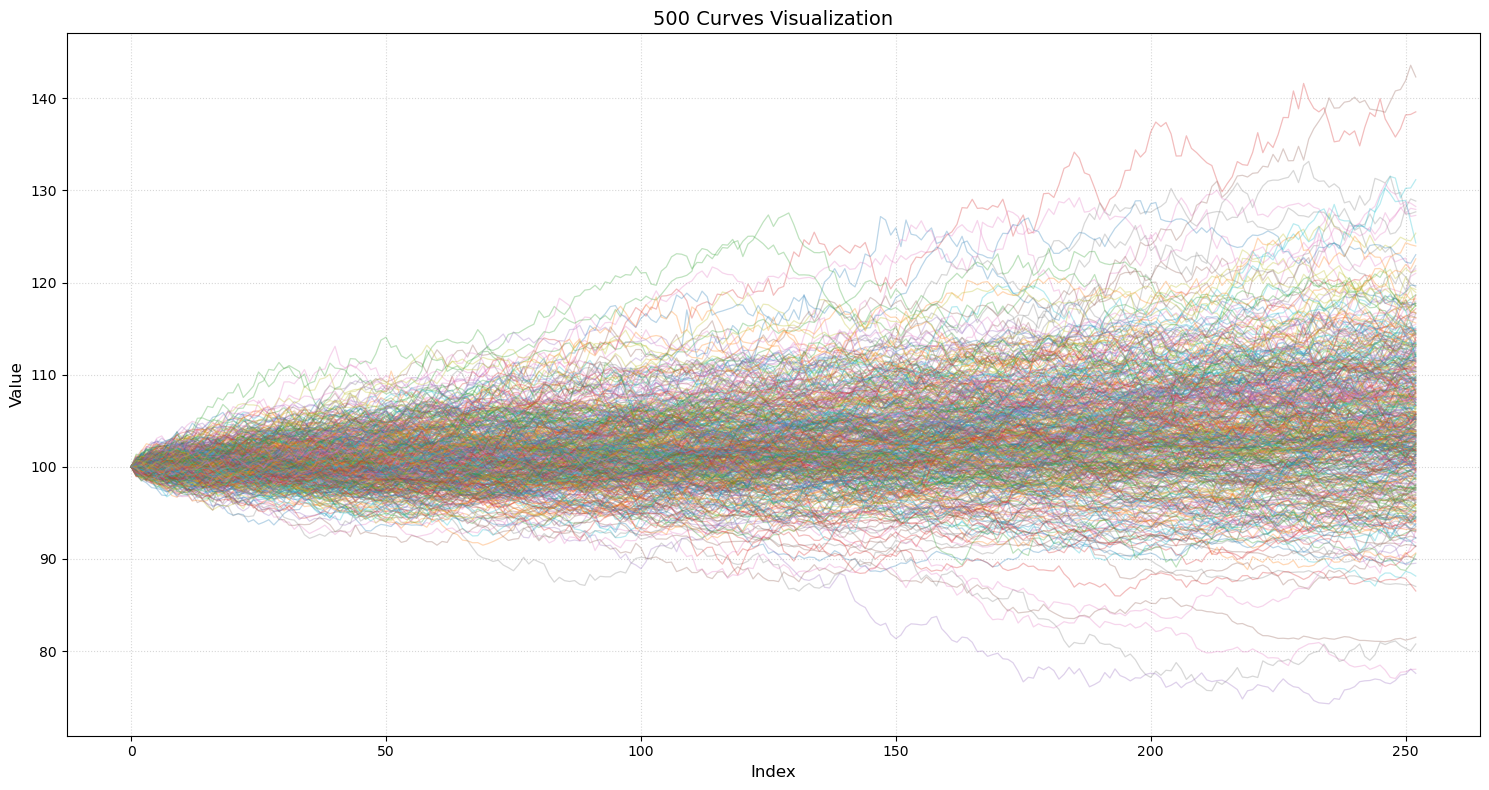

In [44]:
plot_fig(data3)
del data3